In [35]:
import sys
sys.path.append("..")
from coefficients import alignment
import glob
import numpy as np
from imageio import imread

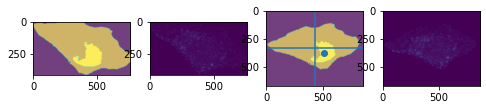

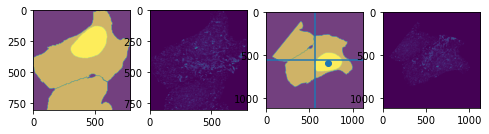

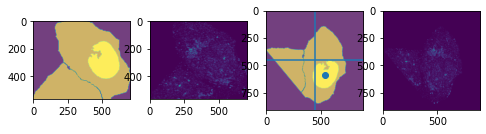

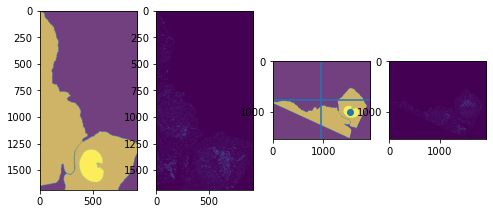

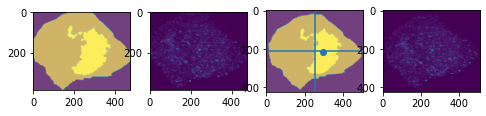

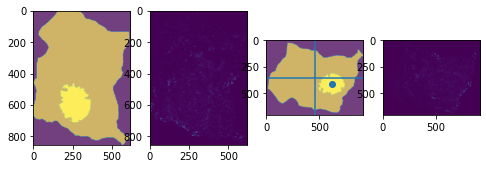

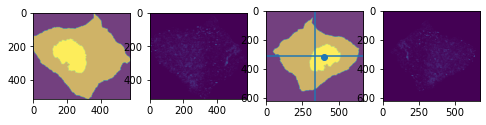

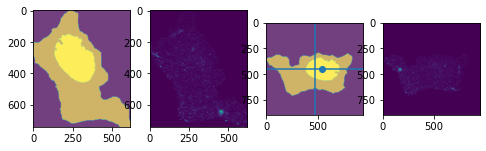

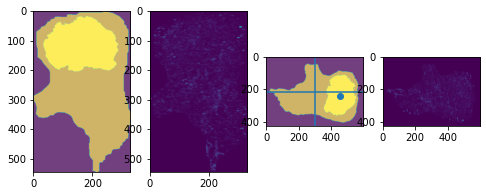

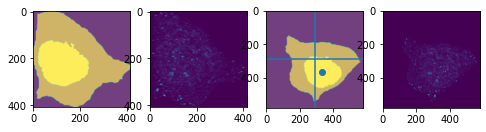

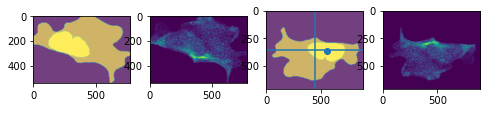

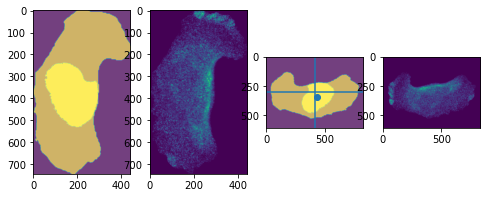

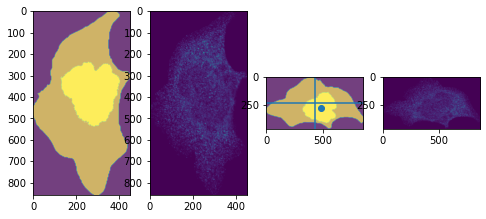

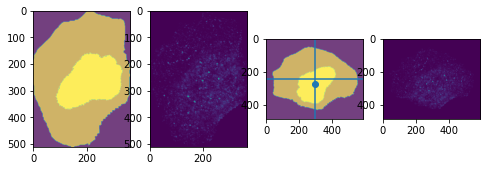

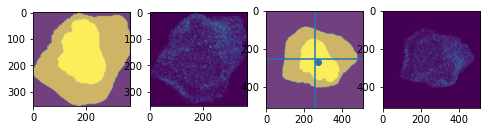

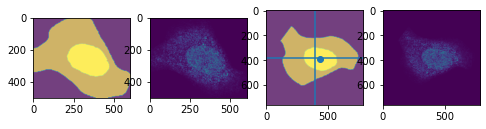

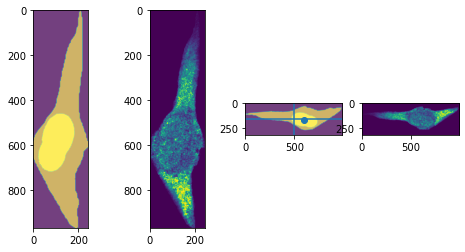

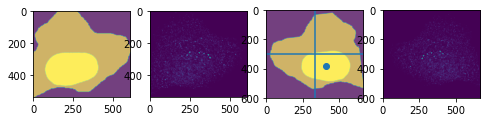

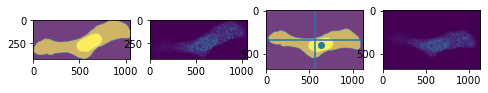

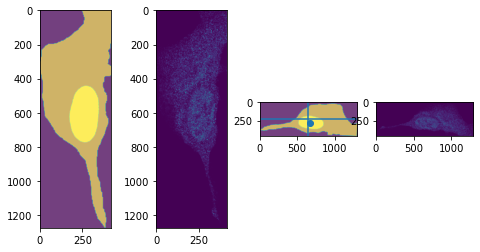

In [61]:
d = "/mnt/c/Users/trang.le/Desktop/shapespace_pilot_data/U2OS_2"
imlist = glob.glob(f"{d}/*.npy")

for im in imlist[100:120]:
    data = np.load(im)
    pro = imread(str(im).replace('.npy', '_protein.png'))
    nuclei_, cell_, theta = align_cell_major_axis(data, pro, plot=True)

In [58]:
from skimage.measure import find_contours, regionprops
from scipy.ndimage import rotate, center_of_mass
import matplotlib.pyplot as plt

def align_cell_major_axis(data, protein_ch, plot=True):
    nuclei = data[1, :, :]
    cell = data[0, :, :]
    region = regionprops(cell)[0]
    theta = region.orientation * 180 / np.pi  # radiant to degree conversion
    cell_ = rotate(cell, 90-theta)
    nuclei_ = rotate(nuclei, 90-theta)
    protein_ch_ = rotate(protein_ch, 90-theta)
    center_ = center_of_mass(nuclei_)
    shape = nuclei_.shape

    if center_[0] < shape[0]//2:
        cell_ = np.flipud(cell_)
        nuclei_ = np.flipud(nuclei_)
        protein_ch_ = np.flipud(protein_ch_)
    if center_[1] < shape[1]//2:
        cell_ = np.fliplr(cell_)
        nuclei_ = np.fliplr(nuclei_)
        protein_ch_ = np.fliplr(protein_ch_)

    if True:
        center_ = center_of_mass(nuclei_)
        fig, ax = plt.subplots(1, 4, figsize=(8, 4))
        ax[0].imshow(nuclei, alpha=0.5)
        ax[0].imshow(cell, alpha=0.5)
        ax[1].imshow(protein_ch)
        ax[2].imshow(nuclei_, alpha=0.5)
        ax[2].imshow(cell_, alpha=0.5)
        ax[2].scatter(center_[1],center_[0])
        ax[2].vlines(shape[1]//2, 0, shape[0]-1)
        ax[2].hlines(shape[0]//2, 0, shape[1]-1)
        ax[3].imshow(protein_ch_)
    return nuclei_, cell_, 90-theta

In [24]:
center_of_mass(nuclei_), nuclei_.shape, theta


((211.08502191998343, 118.68652697711346), (600, 330), 87.67815179919887)